In [1]:
import matplotlib.pyplot as plt
import numpy as np
img = plt.imread('images/dog2.jpg')
I = img[:,:,0]*0.2989+ img[:,:,1]*0.5870+img[:,:,2]*0.1140
#plt.imshow(I,cmap='gray')

In [44]:
kx = np.array(((1,2,1),
             (0,0,0),
             (-1,-2,-1)))
ky = np.array(((1,0,-1),
             (2,0,-2),
             (1,0,-1)))

In [45]:
Ix= np.zeros_like(img_gray)
Iy= np.zeros_like(img_gray)
i =1; j=1
for i in range(1,I.shape[0]-1):
    for j in range(1,I.shape[1]-1):
        Ix[i,j]=np.sum(I[i-1:i+2,j-1:j+2]*kx)
        Iy[i,j]=np.sum(I[i-1:i+2,j-1:j+2]*ky)

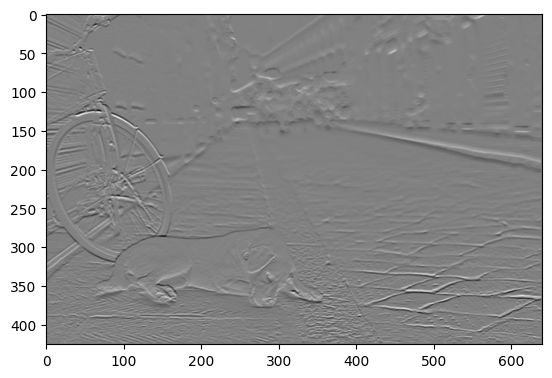

In [39]:
plt.imshow(Ix,cmap='gray')

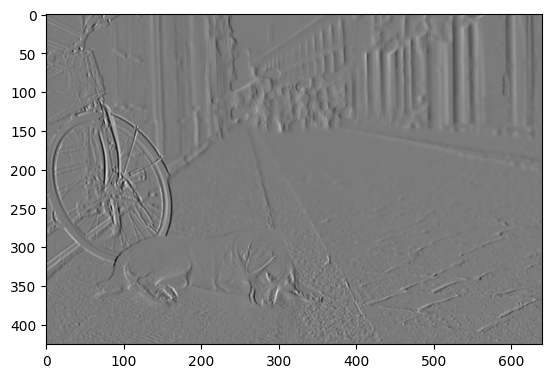

In [38]:
#plt.imshow(Ix,cmap='gray')
plt.imshow(Iy,cmap='gray')

In [60]:
import cv2
Ic = cv2.imread('images/dog2.jpg')

I = cv2.imread('images/dog2.jpg',0)

cor = cv2.cornerHarris(I,2,5,0.2)
cor_1 = cv2.dilate(cor,None)
I[cor_1>0.01*cor_1.max()] = [0]
cv2.imshow('corner',I)
cv2.waitKey()

-1

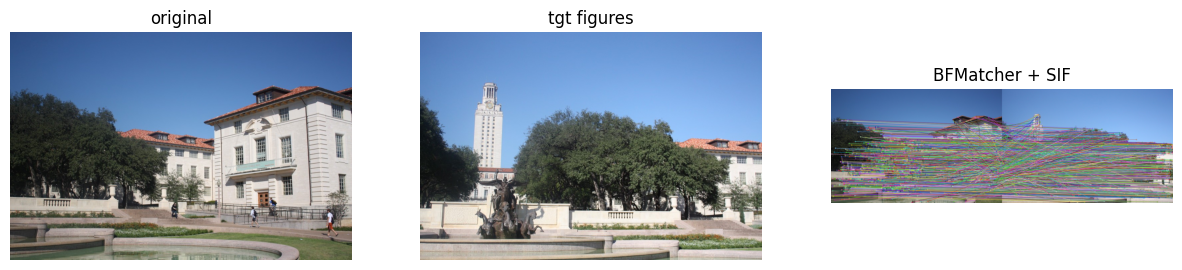

In [3]:
import cv2, numpy as np

img1 = cv2.imread('./images/foto1A.jpg')
img2 = cv2.imread('./images/foto1B.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

detector = cv2.SIFT_create() 
kp1, desc1 = detector.detectAndCompute(gray1, None)  # key points and descriptor
kp2, desc2 = detector.detectAndCompute(gray2, None)
matcher = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True) # BFMatcher, L1 dist, cross chk
matches = matcher.match(desc1, desc2)                 # matching
res = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS) # matching draw
cv2.imshow('BFMatcher + SIFT', res)
cv2.waitKey()
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15,10))
axs[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('original')
axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('tgt figures')
axs[2].imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)), axs[2].axis('off'), axs[2].set_title('BFMatcher + SIF')

plt.show()

In [4]:
img1 = cv2.imread('./images/foto1A.jpg')
img2 = cv2.imread('./images/foto1B.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

detector = cv2.ORB_create() 
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

matcher = cv2.BFMatcher(cv2.NORM_HAMMING2) # BF-Hamming 
matches = matcher.knnMatch(desc1, desc2, 2) # knnMatch, k=2 
ratio = 0.75           # Extract only those where the first neighbor's street is within 75% of the second neighbor's street.
good_matches = [first for first,second in matches if first.distance < second.distance * ratio]
print('matches:%d/%d' %(len(good_matches),len(matches)))

res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, \
                    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
cv2.imshow('Matching', res)
cv2.waitKey()
cv2.destroyAllWindows()

matches:92/500
